In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#get data
data = pd.read_csv('D:/download_D/digit-recognizer/train.csv')

In [3]:
#ep kieu data thang kieu array
data=np.array(data)
m,n=data.shape
#tron ngau nhien tap data
np.random.shuffle(data)

data_train=data[1000:10000]
#tach label va data tu tap data
X=data_train[:,1:]/255
Y=data_train[:,0]


In [4]:

X_val=X[:int(0.1*len(X))]
Y_val=Y[:int(0.1*len(X))]
X=X[int(0.1*len(X)):]
Y=Y[int(0.1*len(Y)):]
Y.shape

(8100,)

In [5]:
#ham khoi tao trong so
def createW(hid_lay):
    dW=[0,0]#delta weight
    W=[]#weight
    W.append(np.random.rand(785,hid_lay[0])-0.5)
    for i in range(len(hid_lay)-1):
        W.append(np.random.rand(hid_lay[i]+1,hid_lay[i+1])-0.5)
        dW.append(0)
    W.append(np.random.rand(hid_lay[-1]+1,10)-0.5)
    return W,dW

In [6]:
#ham de nhap nhap so layer, so node cua la tung layer
def input_lay_nod():
    hid_lay=[]#mang chua so node cua moi layer
    n_hidden=eval(input('nhap so hiden layer: '))#so layer
    for hidden in range(1,n_hidden+1):
        numnode=eval(input(f'nhap so node cua lop: {hidden}'))
        hid_lay.append(numnode)
    return hid_lay


In [7]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [8]:
def addBias(x):
    bs=np.ones((len(x),1))
    return np.concatenate((bs,x),axis=1)

In [9]:
def makelayer(X,W):#(9000,785)
    Z=np.matmul(X,W)
    A=sigmoid(Z)
    A=addBias(A)
    return A

In [10]:
def forward_prop(X,W,hid_lay):
    Ai=[addBias(X)]
    for num_lay in range(len(hid_lay)+1):
        a=makelayer(Ai[num_lay],W[num_lay])
        Ai.append(a)
    return Ai

In [11]:
def backward_prop(A,W,dW,Y,lr,alpha):
    dE_dZ=(A[-1][:,1:]-Y)#(9000,10)
    dW[-1]=np.matmul(A[-2].transpose(),dE_dZ)+alpha*dW[-1]#(101,9000)x(9000,10)
    W[-1]-=lr*dW[-1]
    #
    dE_dA=np.matmul(dE_dZ,W[-1].transpose())#(9000,10)x(10,101)
    dE_dZ=dE_dA*A[-2]*(1-A[-2])#(9000,101)
    dW[-2]=np.matmul(A[-3].transpose(),dE_dZ)+alpha*dW[-2]
    W[-2]-=lr*dW[-2][:,1:]
    for i in range(2,len(W)):
        dE_dZ=dE_dZ[:,1:]
        dE_dA=np.matmul(dE_dZ,W[-i].transpose())#(9000,10)x(10,101)
        dE_dZ=dE_dA*A[-i-1]*(1-A[-i-1])#(9000,101)
        dW[-i-1]=np.matmul(A[-i-2].transpose(),dE_dZ)+alpha*dW[-i-1]
        W[-i-1]-=lr*dW[-i-1][:,1:]
    return W,dW,(Y-A[-1][:,1:])**2


In [12]:
def makeLabel(num,num_class):
    vec = np.zeros(num_class)
    vec[num] = 1
    return vec
T = map(makeLabel,Y,[10]*len(Y))
T = np.array(list(T))

In [13]:
hid_lay=input_lay_nod()
W,dW=createW(hid_lay)
accu=np.array([[]])
accu_val=np.array([[]])
lost=np.array([[]])

In [ ]:

for o in range(1,500):
    A=forward_prop(X,W,hid_lay)
    A_val=forward_prop(X_val,W,hid_lay)
    pred=np.argmax(A[-1][:,1:],axis=1)
    pred_val=np.argmax(A_val[-1][:,1:],axis=1)
    exa=np.sum(pred==Y)
    exa_val=np.sum(pred_val==Y_val)
    print('acc',exa/len(X))
    print('acc',exa_val/len(X_val))
    W,dW,loss=backward_prop(A,W,dW,T,0.00003,0.1)
    lot=np.sum(loss/len(X))
    print('loss ',lot)
    lot=np.array([[lot]])
    acc=np.array([[exa/len(X)]])
    acc_val=np.array([[exa_val/len(X_val)]])
    lost=np.concatenate((lost,lot),axis=None)
    accu=np.concatenate((accu,acc),axis=None)
    accu_val=np.concatenate((accu_val,acc_val),axis=None)


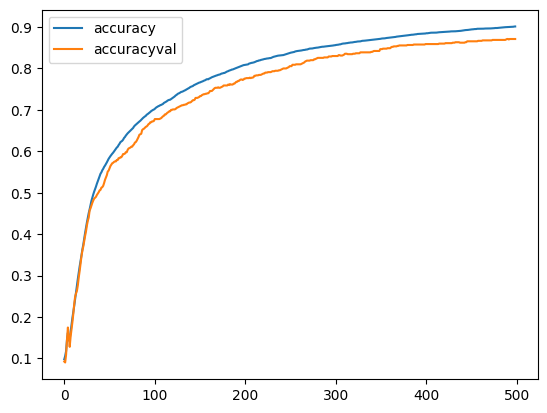

In [17]:
# %matplotlib inline
plt.plot(accu)
plt.plot(accu_val)
plt.legend([ 'accuracy','accuracyval'])
plt.show()



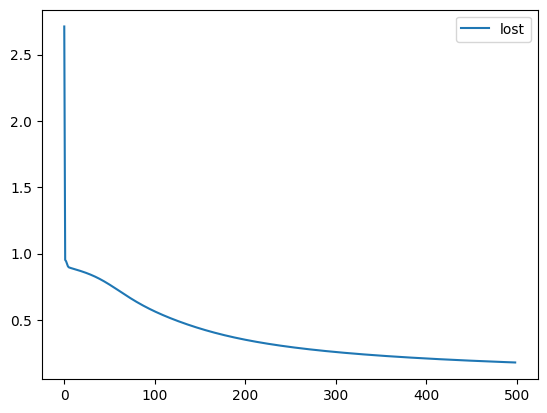

In [18]:
plt.plot(lost)
plt.legend([ 'lost'])
plt.show()